##Final Project Multivariate Analysis - Subway Nutritional Guide with Expected Statistical Methodology (PCA, Factor Analysis, and Clustering Multivariate)
####Name / NIM:
#####1. Elvina Putri Utama / 23101810040
#####2. Florence Ivanny Victoria / 23101810064
#####3. Priscillia Fayline / 23101810071
####Class: Business Mathematics A
#### Source Data:  https://www.subway.com/en-US/MenuNutrition/Nutrition/NutritionGrid

#**Introduction**
#####Subway adalah restoran cepat saji populer yang menyajikan semua jenis sandwich atau salad. Data yang kami ambil berisikan kandungan nutrisi pada setiap menu Subway di negara Amerika Serikat berdasarkan tautan resmi restoran. Nutrisi dikelompokkan berdasarkan jenis makanan yaitu berupa Sandwich, Wraps, Desserts and Salads yang terdiri dari Serving Size, Calories, Total Fat, Saturated Fat, Trans Fat, Cholesterol, Sodium, Carbohydrate, Dietary Fiber, Sugars, dan Protein.
#####Research Question:
#####1. Mendeskripsikan jumlah perhitungan statistik pada kadar nutrisi berdasarkan jenis makanan yang ada di menu Subway.
#####2. Mereduksikan kumpulan data nutrisi dengan menentukan komponen utama yaitu berupa nutrisi dari berbagai macam nutrisi yang ada di menu Subway.
#####3. Mengelompokkan faktor komponen utama berdasarkan jenis makanan (categories) yang ada di dalam menu Subway dengan karakteristik seperti protein diet, carbs diet, fat diet, dan dietary fiber.
#####Dari Research Question tersebut, akan kami ambil manfaat aplikatif yang berguna untuk produsen, konsumen, maupun perusahaan.

####Import Data

In [1]:
# Import libraries
## Basic libs
import pandas as pd
import numpy as np
import warnings
## Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans


# Load dataset
df_subway = pd.read_excel("SUBWAY DATASET.xlsx")

# print(df_bank.info())
print('Shape of dataframe:', df_subway.shape)
df_subway.head()

Shape of dataframe: (70, 13)


Menu  Categories  ...  Sugars (g)  Protein(g)
0          6" Black Forest Ham  Sandwiches  ...           6          19
1      6" Oven Roasted Chicken  Sandwiches  ...           6          23
2                6" Roast Beef  Sandwiches  ...           6          25
3  6" Rotisserie-Style Chicken  Sandwiches  ...           6          29
4              6" Subway Club®  Sandwiches  ...           6          25

[5 rows x 13 columns]

####Preview Data

In [2]:
print('Number of Rows: ', df_subway.shape[0])
print('Number of Columns: ', df_subway.shape[1])

Number of Rows:  70
Number of Columns:  13


In [3]:
df_subway.isnull().sum() 

Menu                 0
Categories           0
Serving Size (g)     0
Calories             0
Total Fat (g)        0
Sat. Fat (g)         0
Trans Fat (g)*       0
Chol. (mg)           0
Sodium (mg)          0
Carbohydrate(g)      0
Dietary Fiber (g)    0
Sugars (g)           0
Protein(g)           0
dtype: int64

In [4]:
df_subway.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Menu               70 non-null     object 
 1   Categories         70 non-null     object 
 2   Serving Size (g)   70 non-null     int64  
 3   Calories           70 non-null     int64  
 4   Total Fat (g)      70 non-null     float64
 5   Sat. Fat (g)       70 non-null     float64
 6   Trans Fat (g)*     70 non-null     float64
 7   Chol. (mg)         70 non-null     int64  
 8   Sodium (mg)        70 non-null     int64  
 9   Carbohydrate(g)    70 non-null     int64  
 10  Dietary Fiber (g)  70 non-null     int64  
 11  Sugars (g)         70 non-null     int64  
 12  Protein(g)         70 non-null     int64  
dtypes: float64(3), int64(8), object(2)
memory usage: 7.2+ KB


In [5]:
df_subway.tail()

Menu Categories  ...  Sugars (g)  Protein(g)
65    Muffin. Apple Cinnamon**    Dessert  ...          24           7
66        Muffin. Banana Nut**    Dessert  ...          24           7
67         Muffin. Blueberry**    Dessert  ...          23           6
68            Muffin. Carrot**    Dessert  ...          27           7
69  Muffin. Double Chocolate**    Dessert  ...          22           7

[5 rows x 13 columns]

# **Exploratory Data Analysis (EDA)**

####Data Exploration

In [6]:
df_subway.describe()

Serving Size (g)    Calories  ...  Sugars (g)  Protein(g)
count         70.000000   70.000000  ...   70.000000   70.000000
mean         243.171429  368.857143  ...   10.271429   19.685714
std          124.212064  198.952276  ...    7.829564   14.831950
min           45.000000   35.000000  ...    0.000000    0.000000
25%          113.000000  212.500000  ...    5.000000    7.000000
50%          267.000000  330.000000  ...    7.000000   19.000000
75%          354.750000  475.000000  ...   14.000000   30.500000
max          430.000000  820.000000  ...   34.000000   59.000000

[8 rows x 11 columns]

In [7]:
by_category = pd.DataFrame({'Categories':df_subway['Categories'].value_counts().index.tolist(),
                            'Count':df_subway['Categories'].value_counts().tolist(),
                            'Calories (Sum)':df_subway[['Categories','Calories']].groupby('Categories').sum()['Calories'],
                            'Calories (Mean)':df_subway[['Categories','Calories']].groupby('Categories').mean()['Calories']})
by_category.reset_index(drop = True)

Categories  Count  Calories (Sum)  Calories (Mean)
0     Dessert     21            6050       288.095238
1       Wraps     19            3100       206.666667
2  Sandwiches     15            5110       340.666667
3      Salads     15           11560       608.421053

In [8]:
df_subway.groupby('Categories').count()

Menu  Serving Size (g)  ...  Sugars (g)  Protein(g)
Categories                          ...                        
Dessert       21                21  ...          21          21
Salads        15                15  ...          15          15
Sandwiches    15                15  ...          15          15
Wraps         19                19  ...          19          19

[4 rows x 12 columns]

In [9]:
df_subway.groupby('Categories').median()

Serving Size (g)  Calories  ...  Sugars (g)  Protein(g)
Categories                              ...                        
Dessert                   80       220  ...          18           3
Salads                   358       180  ...           7          16
Sandwiches               219       330  ...           6          20
Wraps                    342       570  ...           5          38

[4 rows x 11 columns]

In [10]:
df_subway.groupby('Categories').mean()

Serving Size (g)    Calories  ...  Sugars (g)  Protein(g)
Categories                                ...                        
Dessert            79.761905  288.095238  ...   18.428571    3.809524
Salads            364.866667  206.666667  ...    8.200000   16.600000
Sandwiches        221.733333  340.666667  ...    6.266667   21.733333
Wraps             344.631579  608.421053  ...    6.052632   38.052632

[4 rows x 11 columns]

In [11]:
df_subway.groupby('Categories').std()

Serving Size (g)    Calories  ...  Sugars (g)  Protein(g)
Categories                                ...                        
Dessert            35.417375  145.253883  ...    9.314351    2.600366
Salads             35.514316  103.762549  ...    4.091804    6.231258
Sandwiches         32.727155   90.669468  ...    2.282438    6.146621
Wraps              34.520864  150.822307  ...    2.857226   10.705521

[4 rows x 11 columns]

Di bawah ini kami menganalisis hitungan untuk setiap Kategori di menu Subway. Kami mengamati bahwa Wraps dan Dessert telah banyak dikonsumsi oleh pelanggan.

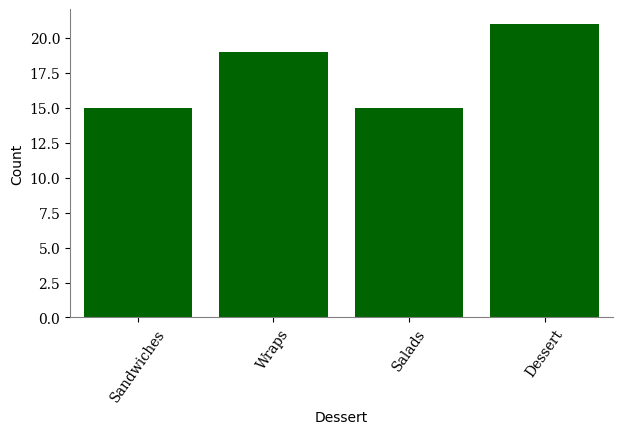

In [12]:
# Plot Category Column
plt.style.use('default')
plt.figure(figsize=(7,4),edgecolor='0.1',dpi=100)
a=sns.countplot(x='Categories',facecolor='darkgreen',data=df_subway)


xticks=plt.xticks(rotation=55,family='serif')
yticks=plt.yticks(family='serif')

plt.xlabel(df_subway['Categories'].all())
plt.ylabel('Count')

a.spines['bottom'].set_color('gray')
a.spines['left'].set_color('gray')
sns.despine()

####Analysis of Number of Items per Category


Di bawah ini kami mengamati bahwa kategori Wraps dan Dessert memiliki paling banyak item unik diikuti dengan Sandwiches dan Salads di menu.

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
px.density_heatmap(x='Categories',y='Menu',data_frame=df_subway,width=900)

####Analysis of Nutrients

Di bawah ini kami mengamati jumlah kalori tertinggi ada pada Wraps diikuti oleh Sandwiches.

In [14]:
# 1. Calories
calories=pd.DataFrame(df_subway.groupby('Categories')['Calories'].mean())
        
colors=['gray']*9
colors[3]='#AF0038'
fig = go.Figure(data=[go.Bar(
    x=calories.index,
    y=calories['Calories'],
    marker_color=colors
)])
fig.update_layout(width=700,height=500)
fig.update_yaxes(title='Avg Calories')
fig.show()

Di bawah ini kami mengamati jumlah Total Fat tertinggi ada pada Wraps diikuti dengan Dessert.

In [15]:
# 2. Total Fat (g)
fat=pd.DataFrame(df_subway.groupby('Categories')['Total Fat (g)'].mean())
        
colors=['gray']*9
colors[3]='#C4451C'
fig = go.Figure(data=[go.Bar(
    x=fat.index,
    y=fat['Total Fat (g)'],
    marker_color=colors
)])
fig.update_yaxes(title='Avg Total Fat')
fig.update_layout(width=700,height=500)
fig.show()

Di bawah ini kami mengamati jumlah Sat Fat (g) tertinggi ada pada Wraps diikuti dengan Dessert.

In [16]:
# 3. Sat Fat (g)
fat=pd.DataFrame(df_subway.groupby('Categories')['Sat. Fat (g)'].mean())
        
colors=['gray']*9
colors[3]='#C4451C'
fig = go.Figure(data=[go.Bar(
    x=fat.index,
    y=fat['Sat. Fat (g)'],
    marker_color=colors
)])
fig.update_yaxes(title='Avg Sat Fat')
fig.update_layout(width=700,height=500)
fig.show()

Di bawah ini kami mengamati jumlah Trans Fat tertinggi ada pada Wraps diikuti dengan Salads.

In [17]:
# 4. Trans Fat (g)
fat=pd.DataFrame(df_subway.groupby('Categories')['Trans Fat (g)*'].mean())
        
colors=['gray']*9
colors[3]='#C4451C'
fig = go.Figure(data=[go.Bar(
    x=fat.index,
    y=fat['Trans Fat (g)*'],
    marker_color=colors
)])
fig.update_yaxes(title='Avg Trans Fat')
fig.update_layout(width=700,height=500)
fig.show()

Di bawah ini kami mengamati jumlah Kolestrol tertinggi ada pada Wraps diikuti dengan Salads dan Sandwiches.

In [18]:
# 5. Cholesterol
chol=pd.DataFrame(df_subway.groupby('Categories')['Chol. (mg)'].mean())
        
colors=['gray']*9
colors[3]='#85660D'
fig = go.Figure(data=[go.Bar(
    x=chol.index,
    y=chol['Chol. (mg)'],
    marker_color=colors
)])
fig.update_yaxes(title='Avg Cholesterol')
fig.update_layout(width=700,height=500)
fig.show()

Di bawah ini kami mengamati jumlah Sodium tertinggi ada pada Wraps diikuti oleh Sandwiches.

In [19]:
# 6. Sodium
chol=pd.DataFrame(df_subway.groupby('Categories')['Sodium (mg)'].mean())
        
colors=['gray']*9
colors[3]='#85660D'
fig = go.Figure(data=[go.Bar(
    x=chol.index,
    y=chol['Sodium (mg)'],
    marker_color=colors
)])
fig.update_yaxes(title='Avg Cholesterol')
fig.update_layout(width=700,height=500)
fig.show()

Di bawah ini kami mengamati jumlah Karbohidrat tertinggi ada pada Wraps diikuti dengan Sandwiches.

In [20]:
# 7. Carbohydrates
carbs=pd.DataFrame(df_subway.groupby('Categories')['Carbohydrate(g)'].mean())
        
colors=['gray']*9
colors[3]='#1C8356'
fig = go.Figure(data=[go.Bar(
    x=carbs.index,
    y=carbs['Carbohydrate(g)'],
    marker_color=colors
)])
fig.update_yaxes(title='Avg Carbohydrates')
fig.update_layout(width=700,height=500)
fig.show()

Di bawah ini kami mengamati jumlah Dietary Fiber tertinggi ada pada Salads diikuti dengan Wraps.

In [21]:
# 8. Dietary Fiber
carbs=pd.DataFrame(df_subway.groupby('Categories')['Dietary Fiber (g)'].mean())
        
colors=['gray']*9
colors[1]='#1C8356'
fig = go.Figure(data=[go.Bar(
    x=carbs.index,
    y=carbs['Dietary Fiber (g)'],
    marker_color=colors
)])
fig.update_yaxes(title='Avg Carbohydrates')
fig.update_layout(width=700,height=500)
fig.show()

Di bawah ini kami mengamati jumlah Sugars tertinggi ada pada Dessert diikuti dengan Salads.

In [22]:
# 9. Sugars
sugars=pd.DataFrame(df_subway.groupby('Categories')['Sugars (g)'].mean())
        
colors=['gray']*9
colors[0]='#B82E2E'
fig = go.Figure(data=[go.Bar(
    x=sugars.index,
    y=sugars['Sugars (g)'],
    marker_color=colors
)])
fig.update_yaxes(title='Avg Sugars')
fig.update_layout(width=700,height=500)
fig.show()

Di bawah ini kami mengamati jumlah Protein tertinggi ada pada Wraps diikuti dengan Sandwiches.

In [23]:
# 10. Protein
protein=pd.DataFrame(df_subway.groupby('Categories')['Protein(g)'].mean())
        
colors=['gray']*9
colors[3]='#B82E2E'
fig = go.Figure(data=[go.Bar(
    x=protein.index,
    y=protein['Protein(g)'],
    marker_color=colors
)])
fig.update_yaxes(title='Avg Protein')
fig.update_layout(width=700,height=500)
fig.show()

####For each Category below we analyze the menus with highest amount of Nutrients in the Subway's menu




Untuk setiap Kategori di bawah ini kami menganalisis item dengan jumlah Nutrisi tertinggi di menu Subway, yaitu pada Dessert, Salads, Sandwiches, Wraps.

In [24]:
# 1. Dessert
Dessert=df_subway[df_subway['Categories']=='Dessert']
cols=['Calories','Total Fat (g)','Sat. Fat (g)','Trans Fat (g)*','Chol. (mg)','Sodium (mg)','Carbohydrate(g)','Dietary Fiber (g)','Sugars (g)','Protein(g)']
for col in cols:
    print(col)
    a=Dessert.groupby('Menu')[col].max().sort_values(ascending=False).head(1)
    print(a)
    print('-'*40)
    print('\n')

Calories
Menu
Cinnamon Roll**    610
Name: Calories, dtype: int64
----------------------------------------


Total Fat (g)
Menu
Muffin. Banana Nut**    28.0
Name: Total Fat (g), dtype: float64
----------------------------------------


Sat. Fat (g)
Menu
Cinnamon Roll**    13.0
Name: Sat. Fat (g), dtype: float64
----------------------------------------


Trans Fat (g)*
Menu
White Chip Macadamia Nut    0.0
Name: Trans Fat (g)*, dtype: float64
----------------------------------------


Chol. (mg)
Menu
Muffin. Blueberry**    70
Name: Chol. (mg), dtype: int64
----------------------------------------


Sodium (mg)
Menu
Biscuit & Gravy**    810
Name: Sodium (mg), dtype: int64
----------------------------------------


Carbohydrate(g)
Menu
Cinnamon Roll**    83
Name: Carbohydrate(g), dtype: int64
----------------------------------------


Dietary Fiber (g)
Menu
Hash Browns**    3
Name: Dietary Fiber (g), dtype: int64
----------------------------------------


Sugars (g)
Menu
Brownie. Gluten Fr

In [25]:
# 2. Salads
Salads=df_subway[df_subway['Categories']=='Salads']
cols=['Calories','Total Fat (g)','Sat. Fat (g)','Trans Fat (g)*','Chol. (mg)','Sodium (mg)','Carbohydrate(g)','Dietary Fiber (g)','Sugars (g)','Protein(g)']
for col in cols:
    print(col)
    a=Salads.groupby('Menu')[col].max().sort_values(ascending=False).head(1)
    print(a)
    print('-'*40)
    print('\n')

Calories
Menu
Chicken & Bacon Ranch Melt (includes Ranch)    460
Name: Calories, dtype: int64
----------------------------------------


Total Fat (g)
Menu
Chicken & Bacon Ranch Melt (includes Ranch)    32.0
Name: Total Fat (g), dtype: float64
----------------------------------------


Sat. Fat (g)
Menu
Chicken & Bacon Ranch Melt (includes Ranch)    11.0
Name: Sat. Fat (g), dtype: float64
----------------------------------------


Trans Fat (g)*
Menu
Meatball Marinara    1.0
Name: Trans Fat (g)*, dtype: float64
----------------------------------------


Chol. (mg)
Menu
Chicken & Bacon Ranch Melt (includes Ranch)    105
Name: Chol. (mg), dtype: int64
----------------------------------------


Sodium (mg)
Menu
Spicy Italian    1000
Name: Sodium (mg), dtype: int64
----------------------------------------


Carbohydrate(g)
Menu
Sweet Onion Chicken Teriyaki    32
Name: Carbohydrate(g), dtype: int64
----------------------------------------


Dietary Fiber (g)
Menu
Meatball Marinara    7
Name

In [26]:
# 3. Sandwiches
Sandwiches=df_subway[df_subway['Categories']=='Sandwiches']
cols=['Calories','Total Fat (g)','Sat. Fat (g)','Trans Fat (g)*','Chol. (mg)','Sodium (mg)','Carbohydrate(g)','Dietary Fiber (g)','Sugars (g)','Protein(g)']
for col in cols:
    print(col)
    a=Sandwiches.groupby('Menu')[col].max().sort_values(ascending=False).head(1)
    print(a)
    print('-'*40)
    print('\n')

Calories
Menu
6" Chicken &  Bacon Ranch Melt    530
Name: Calories, dtype: int64
----------------------------------------


Total Fat (g)
Menu
6" Chicken &  Bacon Ranch Melt    26.0
Name: Total Fat (g), dtype: float64
----------------------------------------


Sat. Fat (g)
Menu
6" Chicken &  Bacon Ranch Melt    10.0
Name: Sat. Fat (g), dtype: float64
----------------------------------------


Trans Fat (g)*
Menu
6" Meatball Marinara    1.0
Name: Trans Fat (g)*, dtype: float64
----------------------------------------


Chol. (mg)
Menu
6" Chicken &  Bacon Ranch Melt    100
Name: Chol. (mg), dtype: int64
----------------------------------------


Sodium (mg)
Menu
6" Spicy Italian    1240
Name: Sodium (mg), dtype: int64
----------------------------------------


Carbohydrate(g)
Menu
6" Sweet Onion Chicken Teriyaki    52
Name: Carbohydrate(g), dtype: int64
----------------------------------------


Dietary Fiber (g)
Menu
6" Veggie Delite®    5
Name: Dietary Fiber (g), dtype: int64
---------

In [27]:
# 4. Wraps
Wraps=df_subway[df_subway['Categories']=='Wraps']
cols=['Calories','Total Fat (g)','Sat. Fat (g)','Trans Fat (g)*','Chol. (mg)','Sodium (mg)','Carbohydrate(g)','Dietary Fiber (g)','Sugars (g)','Protein(g)']
for col in cols:
    print(col)
    a=Wraps.groupby('Menu')[col].max().sort_values(ascending=False).head(1)
    print(a)
    print('-'*40)
    print('\n')

Calories
Menu
Tuna on Tomato Basil Wrap    820
Name: Calories, dtype: int64
----------------------------------------


Total Fat (g)
Menu
Tuna on Tomato Basil Wrap    54.0
Name: Total Fat (g), dtype: float64
----------------------------------------


Sat. Fat (g)
Menu
Spicy Italian on Tomato Wrap    20.0
Name: Sat. Fat (g), dtype: float64
----------------------------------------


Trans Fat (g)*
Menu
Meatball Marinara on Tomato Basil Wrap    2.0
Name: Trans Fat (g)*, dtype: float64
----------------------------------------


Chol. (mg)
Menu
Chicken & Bacon Ranch Melt on Tomato Basil Wrap    170
Name: Chol. (mg), dtype: int64
----------------------------------------


Sodium (mg)
Menu
Spicy Italian on Tomato Wrap    2580
Name: Sodium (mg), dtype: int64
----------------------------------------


Carbohydrate(g)
Menu
Meatball Marinara on Tomato Basil Wrap    77
Name: Carbohydrate(g), dtype: int64
----------------------------------------


Dietary Fiber (g)
Menu
Meatball Marinara on Tomato 

####Normalize Data

In [28]:
from sklearn.preprocessing import normalize

num_cols = ['Serving Size (g)','Calories','Total Fat (g)','Sat. Fat (g)','Trans Fat (g)*','Chol. (mg)','Sodium (mg)','Carbohydrate(g)','Dietary Fiber (g)','Sugars (g)','Protein(g)']
data_scaled = normalize(df_subway[num_cols])
data_scaled = pd.DataFrame(data_scaled, columns=df_subway[num_cols].columns)
data_scaled.head()

Serving Size (g)  Calories  ...  Sugars (g)  Protein(g)
0          0.256900  0.304996  ...    0.007038    0.022288
1          0.349275  0.404740  ...    0.008994    0.034478
2          0.306387  0.381341  ...    0.007890    0.032874
3          0.357904  0.449191  ...    0.008694    0.042021
4          0.276377  0.333955  ...    0.006909    0.028789

[5 rows x 11 columns]

In [29]:
# split data table into data X and class labels y

X_std = data_scaled[['Total Fat (g)','Carbohydrate(g)','Dietary Fiber (g)','Protein(g)']].values
y = df_subway[['Categories']].values

# **Principle Component Analysis (PCA)**

####Eigendecomposition - Computing Eigenvectors and Eigenvalues

In [30]:
import numpy as np
mean_vec = np.mean(X_std, axis=0)
cov_mat = (X_std - mean_vec).T.dot((X_std - mean_vec)) / (X_std.shape[0]-1)
print('Covariance matrix \n%s' %cov_mat)

Covariance matrix 
[[ 1.97371646e-04  2.93918217e-04 -1.59517068e-05 -5.78514222e-05]
 [ 2.93918217e-04  1.31155940e-03  2.77806238e-05 -1.73368217e-04]
 [-1.59517068e-05  2.77806238e-05  1.27174892e-05 -1.08425288e-06]
 [-5.78514222e-05 -1.73368217e-04 -1.08425288e-06  8.82407567e-05]]


Output di atas menunjukkan hasil dari covariance matrix. Covariance matrix, seperti correlation matrix, berisi informasi tentang jumlah varians yang dibagi antara pasangan variabel.

In [31]:
print('NumPy covariance matrix: \n%s' %np.cov(X_std.T))

NumPy covariance matrix: 
[[ 1.97371646e-04  2.93918217e-04 -1.59517068e-05 -5.78514222e-05]
 [ 2.93918217e-04  1.31155940e-03  2.77806238e-05 -1.73368217e-04]
 [-1.59517068e-05  2.77806238e-05  1.27174892e-05 -1.08425288e-06]
 [-5.78514222e-05 -1.73368217e-04 -1.08425288e-06  8.82407567e-05]]


In [32]:
cov_mat = np.cov(X_std.T)

eig_vals, eig_vecs = np.linalg.eig(cov_mat)

print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

Eigenvectors 
[[ 0.23929434  0.92689669  0.22667566 -0.17949623]
 [ 0.96115266 -0.25669886  0.08214398  0.05952837]
 [ 0.01648549 -0.18207998 -0.05035753 -0.98185499]
 [-0.13657236 -0.20448744  0.96919277 -0.01408003]]

Eigenvalues 
[1.40984581e-03 1.31869098e-04 6.00729193e-05 8.10145853e-06]


Eigenvectors adalah komponen utama. Komponen utama pertama adalah kolom pertama dengan nilai 0,24, 0,96, 0,02, dan -0,14. Komponen utama kedua adalah kolom kedua dan seterusnya. Setiap eigenvectors akan sesuai dengan eigenvalues, setiap eigenvectors dapat diskalakan eigenvalues, yang besarnya menunjukkan seberapa banyak variabilitas data dijelaskan oleh eigenvectors.

####Correlation Matrix

In [33]:
cor_mat1 = np.corrcoef(X_std.T)

eig_vals, eig_vecs = np.linalg.eig(cor_mat1)

print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

Eigenvectors 
[[ 0.58521746  0.34114298  0.63889757  0.36462567]
 [ 0.59646323 -0.28308021 -0.62923216  0.41007816]
 [-0.0394783  -0.88827718  0.44124197  0.12128738]
 [-0.54789926  0.1202111  -0.03438464  0.82714774]]

Eigenvalues 
[2.02067571 1.19520935 0.23475579 0.54935915]


####Selecting Principal Components

In [34]:
#Sorting Eigenpairs
for ev in eig_vecs.T:
    np.testing.assert_array_almost_equal(1.0, np.linalg.norm(ev))
print('OK!')

OK!


In [35]:
# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs.sort(key=lambda x: x[0], reverse=True)

# Visually confirm that the list is correctly sorted by decreasing eigenvalues
print('Eigenvalues in descending order:')
for i in eig_pairs:
    print(i[0])

Eigenvalues in descending order:
2.0206757076982633
1.1952093501853305
0.5493591528935927
0.23475578922281395


####Explained Variance (Picking Principal Components Using the Explained Variance)

In [36]:
tot = sum(eig_vals)
var_exp = [(i / tot)*100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

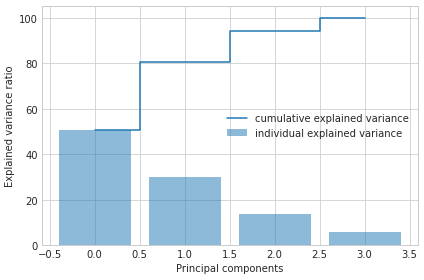

In [37]:
import matplotlib.pyplot as plt
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(6, 4))

    plt.bar(range(4), var_exp, alpha=0.5, align='center',
            label='individual explained variance')
    plt.step(range(4), cum_var_exp, where='mid',
             label='cumulative explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.legend(loc='best')
    plt.tight_layout()

Berdasarkan explained variance, jumlah principal components yang didapatkan adalah 3 komponen.

In [38]:
# Picking Principal Components Using the Explained Variance
# Calculating the explained variance on each of components
variance_explained = []
for i in eig_vals:
     variance_explained.append((i/sum(eig_vals))*100)
        
print(variance_explained)

[50.51689269245657, 29.880233754633256, 5.868894730570347, 13.733978822339814]


50,51% varians pada data kami dijelaskan oleh komponen utama pertama, komponen utama kedua menjelaskan 29,88% data.

####Determining How Many Components


In [39]:
# Identifying components that explain at least 95%
cumulative_variance_explained = np.cumsum(variance_explained)
print(cumulative_variance_explained)

[ 50.51689269  80.39712645  86.26602118 100.        ]


Melalui cumulative variance explained juga didapatkan 3 komponen.

Text(0.5, 1.0, 'Explained variance vs Number of components')

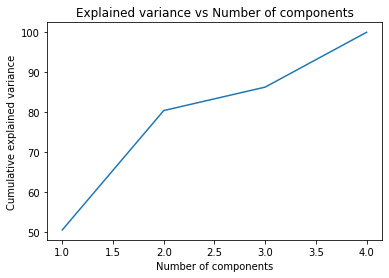

In [40]:
# Visualizing the eigenvalues and finding the "elbow" in the graphic
sns.lineplot(x = [1,2,3,4], y=cumulative_variance_explained)
plt.xlabel("Number of components")
plt.ylabel("Cumulative explained variance")
plt.title("Explained variance vs Number of components")

####Project Data Onto Lower-Dimensional Linear Subspace

In [41]:
# Using two first components (because those explain more than 95%)
projection_matrix = (eig_vecs.T[:][:2]).T
print(projection_matrix)

[[ 0.58521746  0.34114298]
 [ 0.59646323 -0.28308021]
 [-0.0394783  -0.88827718]
 [-0.54789926  0.1202111 ]]


In [42]:
# Getting the product of original standardized X and the eigenvectors 
X_pca = X_std.dot(projection_matrix)
print(X_pca)

[[ 0.01898996 -0.01454489]
 [ 0.01964893 -0.01769722]
 [ 0.01656482 -0.01475942]
 [ 0.01634964 -0.01482565]
 [ 0.01485639 -0.01344783]
 [ 0.02250754 -0.01710633]
 [ 0.01975556 -0.01685639]
 [ 0.05046909 -0.03586306]
 [ 0.0157447  -0.00085268]
 [ 0.01946237 -0.00625553]
 [ 0.01937149 -0.00416729]
 [ 0.02447522 -0.00750111]
 [ 0.02087318 -0.0027186 ]
 [ 0.01470619 -0.00594239]
 [ 0.03381639 -0.00217102]
 [ 0.01544241 -0.00255793]
 [ 0.01413185 -0.0030668 ]
 [ 0.01089563 -0.00043745]
 [ 0.01308792 -0.00092653]
 [ 0.01336481 -0.00648339]
 [ 0.01196604 -0.00650785]
 [ 0.00988702 -0.00555651]
 [ 0.00922124 -0.00415924]
 [ 0.00871325 -0.00522005]
 [ 0.01457969 -0.00810036]
 [ 0.01277228 -0.00658984]
 [ 0.03439921 -0.01753725]
 [ 0.01093548  0.00045666]
 [ 0.01491569 -0.0030955 ]
 [ 0.01518673 -0.00144684]
 [ 0.02131873 -0.00531173]
 [ 0.01732633  0.00065122]
 [ 0.01203224 -0.00335505]
 [ 0.02805035  0.00239014]
 [ 0.00325083 -0.00677706]
 [-0.0016175  -0.00769931]
 [-0.00226411 -0.00577098]
 

Oleh karena itu, melalui pendekatan Principle Component Analysis didapatkan 3 komponen.

# **Factor Analysis**

In [43]:
X = df_subway[['Serving Size (g)', 'Calories','Total Fat (g)', 'Sat. Fat (g)', 'Trans Fat (g)*', 'Chol. (mg)','Sodium (mg)', 'Carbohydrate(g)', 'Dietary Fiber (g)','Sugars (g)', 'Protein(g)']]
dataX=pd.DataFrame(X)
dataX

Serving Size (g)  Calories  ...  Sugars (g)  Protein(g)
0                219       260  ...           6          19
1                233       270  ...           6          23
2                233       290  ...           6          25
3                247       310  ...           6          29
4                240       290  ...           6          25
..               ...       ...  ...         ...         ...
65               113       440  ...          24           7
66               113       480  ...          24           7
67               113       440  ...          23           6
68               113       410  ...          27           7
69               113       460  ...          22           7

[70 rows x 11 columns]

In [44]:
dataX.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serving Size (g)   70 non-null     int64  
 1   Calories           70 non-null     int64  
 2   Total Fat (g)      70 non-null     float64
 3   Sat. Fat (g)       70 non-null     float64
 4   Trans Fat (g)*     70 non-null     float64
 5   Chol. (mg)         70 non-null     int64  
 6   Sodium (mg)        70 non-null     int64  
 7   Carbohydrate(g)    70 non-null     int64  
 8   Dietary Fiber (g)  70 non-null     int64  
 9   Sugars (g)         70 non-null     int64  
 10  Protein(g)         70 non-null     int64  
dtypes: float64(3), int64(8)
memory usage: 6.1 KB


In [45]:
np.array(list(dataX.columns),dtype=object)

array(['Serving Size (g)', 'Calories', 'Total Fat (g)', 'Sat. Fat (g)',
       'Trans Fat (g)*', 'Chol. (mg)', 'Sodium (mg)', 'Carbohydrate(g)',
       'Dietary Fiber (g)', 'Sugars (g)', 'Protein(g)'], dtype=object)

In [46]:
dataX.isnull().sum()

Serving Size (g)     0
Calories             0
Total Fat (g)        0
Sat. Fat (g)         0
Trans Fat (g)*       0
Chol. (mg)           0
Sodium (mg)          0
Carbohydrate(g)      0
Dietary Fiber (g)    0
Sugars (g)           0
Protein(g)           0
dtype: int64

## **BARTLETT’S TEST OF SPHERICITY**

In [47]:
!pip install factor_analyzer

In [48]:
from factor_analyzer import calculate_bartlett_sphericity
chi2,p = calculate_bartlett_sphericity(dataX)
print("Chi squared value : ",chi2)
print("p value : ",p)

Chi squared value :  1200.5844361907425
p value :  2.0076761511078307e-215


Dari hasil pvalue di atas=2.00767615e^(-215) menyatakan bahwa p value lebih kecil dari pada nilai alpha(0,05). Hal ini menyimpulkan bahwa correlation is not an identical matrix, correlation is present among the variables with a 95% confidence level. Maka cocok untuk dilakukan Factor Analysis lebih lanjut

## Correlation Matrix

In [49]:
import seaborn as sns

In [50]:
#cek signifikansi independent var pake tes korelasi pake heatmap
corr_df = dataX.corr()

fig, ax = plt.subplots(figsize=(15, 15))
sns.heatmap(corr_df, annot=True, fmt='.2%')
plt.show()

In [51]:
dataX.corr()

Serving Size (g)  Calories  ...  Sugars (g)  Protein(g)
Serving Size (g)           1.000000  0.361892  ...   -0.515351    0.740335
Calories                   0.361892  1.000000  ...   -0.046085    0.711487
Total Fat (g)              0.240821  0.884805  ...    0.029300    0.440224
Sat. Fat (g)               0.249519  0.843920  ...   -0.050775    0.495919
Trans Fat (g)*             0.273612  0.454903  ...   -0.069298    0.254752
Chol. (mg)                 0.600174  0.791132  ...   -0.205957    0.858215
Sodium (mg)                0.623002  0.813936  ...   -0.435811    0.822302
Carbohydrate(g)            0.063083  0.808906  ...    0.196902    0.495320
Dietary Fiber (g)          0.735710  0.288002  ...   -0.371553    0.503831
Sugars (g)                -0.515351 -0.046085  ...    1.000000   -0.480359
Protein(g)                 0.740335  0.711487  ...   -0.480359    1.000000

[11 rows x 11 columns]

##**KAISER-MEYER-OLKIN (KMO) TEST**


In [52]:
from factor_analyzer import calculate_kmo
kmo_vars,kmo_model = calculate_kmo(dataX)
print(kmo_model)

0.6293915448229741


KMO mengukur proporsi variance dimana merupakan common variance diantara variabel. Berdasarkan hasil KMO didapatkan sebesar 0.62939. Hal ini menyimpulan bahwa data ini memiliki lebih banyak korelasi dan teknik reduksi seperti metode pada Factor Analysis dapat diterapkan.

In [53]:
from sklearn.preprocessing import StandardScaler

In [54]:
from factor_analyzer import FactorAnalyzer

In [55]:
# Standardizing data
scaler =  StandardScaler()
dataframe = scaler.fit_transform(dataX)
dataframe = pd.DataFrame(data=dataframe,columns=dataX.columns)
dataframe.head(10)

Serving Size (g)  Calories  ...  Sugars (g)  Protein(g)
0         -0.196003 -0.551103  ...   -0.549490   -0.046566
1         -0.082479 -0.500476  ...   -0.549490    0.225069
2         -0.082479 -0.399224  ...   -0.549490    0.360887
3          0.031045 -0.297972  ...   -0.549490    0.632522
4         -0.025717 -0.399224  ...   -0.549490    0.360887
5          0.177005 -0.196719  ...    0.479655    0.360887
6         -0.196003 -0.601729  ...   -0.549490    0.021343
7         -0.658209 -0.854860  ...   -0.678134   -0.725654
8          0.339183  0.815805  ...   -0.549490    1.107884
9         -0.244656 -0.196719  ...   -0.678134   -0.250293

[10 rows x 11 columns]

In [56]:
fa = FactorAnalyzer(rotation = None,impute = "drop",n_factors=dataframe.shape[1])

In [57]:
fa.fit(dataframe)

FactorAnalyzer(bounds=(0.005, 1), impute='drop', is_corr_matrix=False,
               method='minres', n_factors=11, rotation=None, rotation_kwargs={},
               use_smc=True)

In [58]:
ev,_ = fa.get_eigenvalues()

## Determining the number of factors

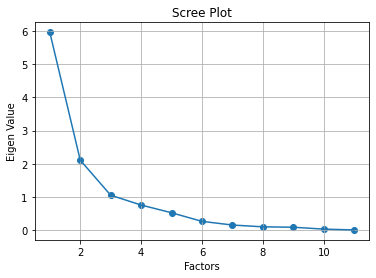

In [59]:
plt.scatter(range(1,dataframe.shape[1]+1),ev)
plt.plot(range(1,dataframe.shape[1]+1),ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigen Value')
plt.grid()

Berdasarkan pada grafik Scree Plot, menampilkan bahwa jumlah faktor yang optimal adalah 4. Hal ini terlihat bahwa nilai eigen (jumlah varians yang dijelaskan oleh faktor-faktor tersebut) turun ke bawah dari faktor 1 menuju 5, sehingga jumlah faktor yang optimal adalah 4. Dikarenakan pada faktor 5, mulai melandai.

## Interpreting the factors

In [60]:
fa = FactorAnalyzer(n_factors=4,rotation='varimax') #quartimax (tetap lakukan trial and error n=4, apakah miirp hasilnya)
fa.fit(dataX)

FactorAnalyzer(bounds=(0.005, 1), impute='median', is_corr_matrix=False,
               method='minres', n_factors=4, rotation='varimax',
               rotation_kwargs={}, use_smc=True)

In [61]:
with np.printoptions(suppress=True,precision=4):
    print(pd.DataFrame(fa.get_eigenvalues()[0],columns=['EigenValues']))

    EigenValues
0      5.968820
1      2.106772
2      1.048639
3      0.751485
4      0.518229
5      0.258753
6      0.147743
7      0.093732
8      0.081396
9      0.024165
10     0.000267


In [62]:
#Loadings score 
with np.printoptions(suppress=True,precision=4):
    print(pd.DataFrame(fa.loadings_,index=dataframe.columns))

                          0         1         2         3
Serving Size (g)   0.127764  0.819910  0.016434  0.348409
Calories           0.777778  0.260968  0.557966  0.110392
Total Fat (g)      0.914905  0.079702  0.202924  0.103675
Sat. Fat (g)       0.923079  0.121803  0.175361  0.124880
Trans Fat (g)*     0.460724  0.041897  0.065257  0.578633
Chol. (mg)         0.554640  0.599660  0.359831 -0.052872
Sodium (mg)        0.561139  0.594347  0.365559  0.224335
Carbohydrate(g)    0.379517 -0.037117  0.918844  0.133977
Dietary Fiber (g) -0.025994  0.507666  0.126835  0.828348
Sugars (g)         0.027733 -0.630897  0.179580 -0.113303
Protein(g)         0.327952  0.843612  0.420067  0.040456


Menyimpulkan bahwa:

Factor 0: Variable yang influencenya kuat adalah Total Fat, Sat.Fat, sedangkan yang negatif yaitu Dietary Fiber

Factor 1: Variable yang influencenya kuat adalah Protein, Serving Size, sedangkan yang negatif yaitu Carbohydrate, Sugars

Factor 2: Variable yang influencenya kuat adalah Carbohydrate

Factor 3: Variable yang influencenya kuat adalah Dietary Fiber, sedangkan yang negatif yaitu Chol, Sugars

In [63]:
# Variance 

with np.printoptions(suppress=True,precision=4):
    print(pd.DataFrame(fa.get_factor_variance(),index=['Variance','Proportional Var','Cumulative Var']))

                         0         1         2         3
Variance          3.398187  2.844954  1.719961  1.266441
Proportional Var  0.308926  0.258632  0.156360  0.115131
Cumulative Var    0.308926  0.567558  0.723918  0.839049


Dalam penelitian ini, 4 faktor bersama-sama mampu menjelaskan 83,9% dari total varians.

## Communalities

In [64]:
with np.printoptions(precision=4,suppress=True):
    print(pd.DataFrame(fa.get_communalities(),index=dataframe.columns,columns=['Communalities']))

                   Communalities
Serving Size (g)        0.810235
Calories                0.996554
Total Fat (g)           0.895330
Sat. Fat (g)            0.913258
Trans Fat (g)*          0.553097
Chol. (mg)              0.799491
Sodium (mg)             0.852085
Carbohydrate(g)         1.007634
Dietary Fiber (g)       0.960647
Sugars (g)              0.443886
Protein(g)              0.997326


Pada hasil diatas merupakan sebuah proporsi varians masing-masing variabel yang dijelaskan oleh faktor-faktor. 
Dimana dibawah ini terdapat beberapa variabel yang jumlah variansnya besar:

1. Calories yaitu sekitar 99,6% variansnya dijelaskan oleh semua faktor secara bersama-sama.
2.Dietary Fiber yaitu sekitar 96% variansnya dijelaskan oleh semua faktor secara bersama-sama.
3. Protein yaitu sekitar 99,7% variansnya dijelaskan oleh semua faktor secara bersama-sama
4. Total Fat yaitu sebesar 89,5% variansnya dijelaskan oleh semua faktor secara bersama-sama

Berdasarkan metode Factor Analysis diatas, menyimpulkan bahwa pada penelitian akan menggunakan beberapa variabel yaitu Total Fat, Carbohydrate, Dietary Fiber, and Protein. Variabel tersebut akan dilakukan proses clustering lebih lanjut

#**Clustering Multivariate**

In [65]:
# Import libraries
## Basic libs
import pandas as pd
import numpy as np
import warnings
## Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

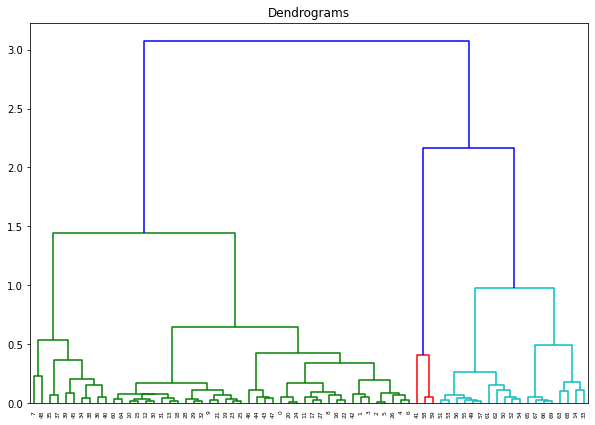

In [66]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(data_scaled, method='ward'))

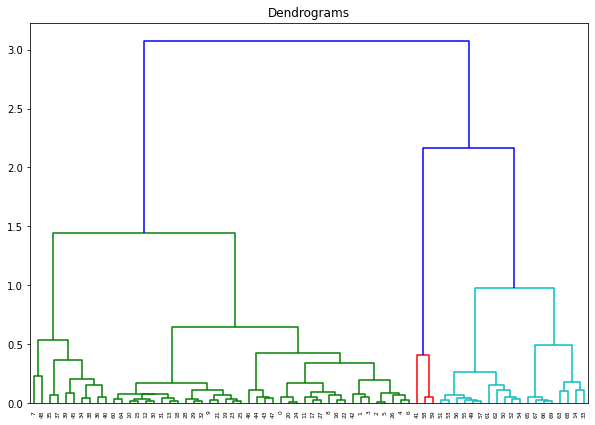

In [67]:
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(data_scaled, method='ward'))
plt.axhline(y=6, color='r', linestyle='--')

Berdasarkan hasil dendograms, menyimpulkan bahwa jumlah cluster yang optimal adalah 4

In [68]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')  
cluster.fit_predict(data_scaled)

array([1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 3, 3, 3, 3, 3, 3, 3, 2, 1, 1,
       1, 3, 1, 1, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0])

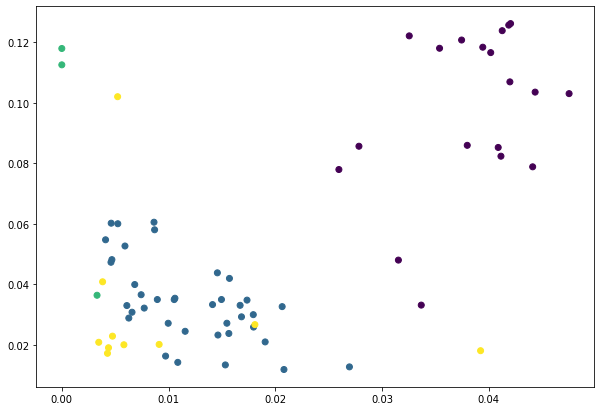

In [69]:
plt.figure(figsize=(10, 7))  
plt.scatter(data_scaled['Total Fat (g)'], data_scaled['Carbohydrate(g)'], c=cluster.labels_) 

####K-Means

In [70]:
from sklearn.datasets.samples_generator import make_blobs
# create simulated clusters using scikit learn's make_blobs
X_std, true_cluster = make_blobs(n_samples=70, 
                                centers=4,
                                random_state=0, 
                                cluster_std=0.60)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning:

The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.



In [71]:
data_df = pd.DataFrame(X_std)
data_df.columns=['X','z']
data_df['true_cluster'] = true_cluster
data_df.head(n=4)

X         z  true_cluster
0 -1.148252  8.216479             3
1 -2.289195  3.499520             2
2  1.164111  3.791330             0
3  1.062696  5.176351             0

In [72]:
color_map= {0:'red',1:'yellow',2:'green',3:'blue'}
data_df['true_color'] = data_df.true_cluster.map(color_map)
data_df.head(n=4)

X         z  true_cluster true_color
0 -1.148252  8.216479             3       blue
1 -2.289195  3.499520             2      green
2  1.164111  3.791330             0        red
3  1.062696  5.176351             0        red

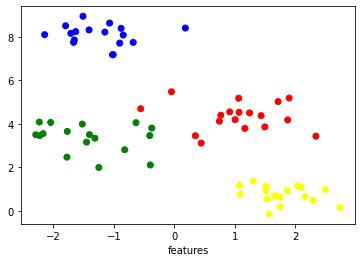

In [73]:
plt.scatter(x='X',y='z',c='true_color',data=data_df)
plt.xlabel("x")
plt.xlabel("features")
plt.savefig('kmeans_data.png')

Secara kasat mata, relatif mudah untuk melihat empat kelompok. Oleh karena itu, kami melakukan iterasi untuk mendapatkan posisi yang terbaik dalam memplot pusat empat cluster.

####Manual Iteration

First Iteration

Text(0.5, 0, 'features')

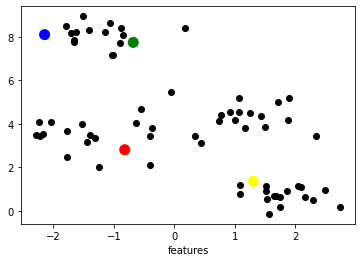

In [74]:
current_centers = data_df.sample(4,random_state=1)
plt.scatter(x='X',y='z',
           c='black',
           data=data_df)
plt.scatter(x='X',y='z', 
           data=current_centers,
           c=['red','green','blue','yellow'],
           s=100)
plt.xlabel("X")
plt.xlabel("features")

In [75]:
# distance
def dist(X, z):
    return sum((xi - yi) ** 2 for xi, yi in zip(X, z))

In [76]:
def assign_cluster_labels(data, centers):
    cluster_labels = []
    for point in data:
        # compute distances between three cluster centers to a data point
        distances = [dist(point, center) for center in centers]
        # find which cluster is closest to the data point and assign the cluster  it
        cluster_labels.append(distances.index(min(distances)))
    return cluster_labels

In [77]:
current_labels = assign_cluster_labels(data_df[['X','z']].values, 
                                      current_centers[['X','z']].values)
current_labels[0:5]
[2, 0, 0, 0, 0, 2, 0, 0, 0, 0]

[2, 0, 0, 0, 0, 2, 0, 0, 0, 0]

Second Iteration

In [78]:
current_centers = data_df[['X','z']].groupby(current_labels).mean()

          X         z
0 -0.349041  3.810458
1 -0.742337  7.700127
2 -1.689398  8.233411
3  1.800910  1.184627


Text(0.5, 0, 'features')

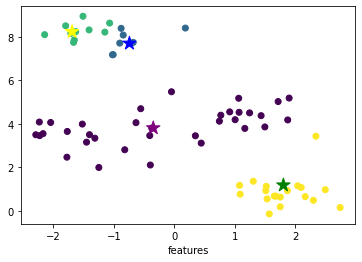

In [79]:
current_centers = data_df[['X','z']].groupby(current_labels).mean()
print(current_centers)
current_labels = assign_cluster_labels(data_df[['X','z']].values, 
                                      current_centers.values)
 
plt.scatter(x='X',y='z',c=current_labels,data=data_df)
plt.scatter(x='X',y='z',data=current_centers,c=['purple','blue','yellow','green'],marker='*', s=200)
plt.xlabel("X")
plt.xlabel("features")

Third Iteration

          X         z
0 -0.220591  3.871695
1 -0.736902  7.811321
2 -1.573275  8.271505
3  1.813235  0.886210


Text(0.5, 0, 'features')

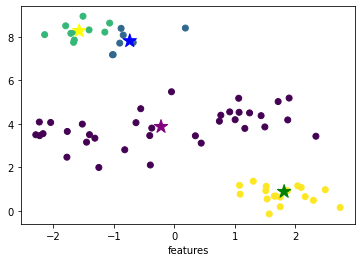

In [80]:
current_centers = data_df[['X','z']].groupby(current_labels).mean()
print(current_centers)
current_labels = assign_cluster_labels(data_df[['X','z']].values, 
                                      current_centers.values)
 
plt.scatter(x='X',y='z',c=current_labels,data=data_df)
plt.scatter(x='X',y='z',data=current_centers,c=['purple','blue','yellow','green'],marker='*', s=200)
plt.xlabel("X")
plt.xlabel("features")

In [81]:
def initialize_centers(X,K):
    '''Implements K-Means++ initialization given the data matrix X and the number of cluster K
    Input:
        X - shape (N, D) - data matrix containing N examples of D-dimensional data
        K - a positive integer - the number of clusters
    
    Output:
        mu - shape(K,D) - K centroids each of which is a D-dimensional vector
    '''
    
    N,D = X.shape #find out the number of example and the dimesion of the data
    mu = np.zeros((K,D)) #initialize th

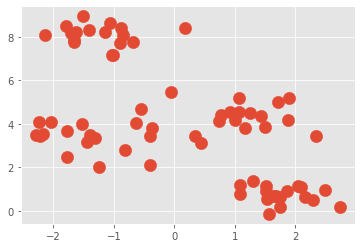

In [82]:
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
import numpy as np

plt.scatter(X_std[:,0], X_std[:,1], s=150)
plt.show()

"Pusat cluster" adalah rata-rata aritmatika dari semua titik yang termasuk dalam cluster. Setiap titik lebih dekat ke pusat klasternya sendiri daripada ke pusat klaster lainnya.

Melalui manual iterasi, penempatan pusat cluster yang terbaik berada pada saat iterasi ketiga.

####Automatic Iteration

In [83]:
class K_Means:
    def __init__(self, k=4, tol=0.001, max_iter=300):
        self.k = k
        self.tol = tol
        self.max_iter = max_iter

In [84]:
 def fit(self,data):

        self.centroids = {}

        for i in range(self.k):
            self.centroids[i] = data[i]

In [85]:
class K_Means:
    def __init__(self, k=4, tol=0.001, max_iter=300):
        self.k = k
        self.tol = tol
        self.max_iter = max_iter

    def fit(self,data):

        self.centroids = {}

        for i in range(self.k):
            self.centroids[i] = data[i]

        for i in range(self.max_iter):
            self.classifications = {}

            for i in range(self.k):
                self.classifications[i] = []

In [86]:
class K_Means:
    def __init__(self, k=4, tol=0.001, max_iter=300):
        self.k = k
        self.tol = tol
        self.max_iter = max_iter

    def fit(self,data):

        self.centroids = {}

        for i in range(self.k):
            self.centroids[i] = data[i]

        for i in range(self.max_iter):
            self.classifications = {}

            for i in range(self.k):
                self.classifications[i] = []

            for featureset in data:
                distances = [np.linalg.norm(featureset-self.centroids[centroid]) for centroid in self.centroids]
                classification = distances.index(min(distances))
                self.classifications[classification].append(featureset)

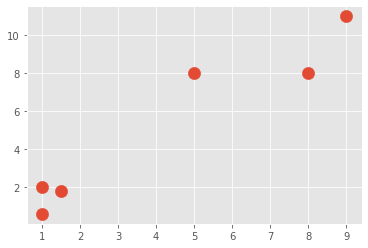

In [87]:
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
import numpy as np

X = np.array([[1, 2],
              [1.5, 1.8],
              [5, 8 ],
              [8, 8],
              [1, 0.6],
              [9,11]])

plt.scatter(X[:,0], X[:,1], s=150)
plt.show()

colors = 10*["g","r","c","b","k"]


class K_Means:
    def __init__(self, k=2, tol=0.001, max_iter=300):
        self.k = k
        self.tol = tol
        self.max_iter = max_iter
        def fit(self,data):

          self.centroids = {}

        for i in range(self.k):
            self.centroids[i] = data[i]

        for i in range(self.max_iter):
            self.classifications = {}

            for i in range(self.k):
                self.classifications[i] = []

            for featureset in data:
                distances = [np.linalg.norm(featureset-self.centroids[centroid]) for centroid in self.centroids]
                classification = distances.index(min(distances))
                self.classifications[classification].append(featureset)

            prev_centroids = dict(self.centroids)

            for classification in self.classifications:
                self.centroids[classification] = np.average(self.classifications[classification],axis=0)

In [88]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import make_blobs
data = make_blobs(n_samples=28, n_features=4, 
                           centers=6, cluster_std=1.8,random_state=101)
data[0].shape
plt.scatter(data[0][:,0],data[0][:,1],c=data[1],cmap='brg')

plt.show()
from sklearn.cluster import KMeans

print("First iteration points:")
kmeans = KMeans(n_clusters=4,random_state=0,max_iter=1)
kmeans.fit(data[0])
centroids=kmeans.cluster_centers_
print(kmeans.cluster_centers_)
print("Second iteration points:")
kmeans = KMeans(n_clusters=4,random_state=0,max_iter=2)
kmeans.fit(data[0])
print(kmeans.cluster_centers_)
print("Third iteration points:")
kmeans = KMeans(n_clusters=4,random_state=0,max_iter=3)
kmeans.fit(data[0])
print(kmeans.cluster_centers_)
print("Forth iteration points:")
kmeans = KMeans(n_clusters=4,random_state=0,max_iter=4)
kmeans.fit(data[0])
print(kmeans.cluster_centers_)

First iteration points:
[[-7.99840903  4.82835752  6.81224925 -5.55356515]
 [ 2.19984003  1.50225695 -9.16395392 -6.08224561]
 [ 4.28942832 -6.23481283  0.966366   -1.13860851]
 [ 3.29994466  7.87502235 -3.35353655  8.16507078]]
Second iteration points:
[[-7.99840903  4.82835752  6.81224925 -5.55356515]
 [ 2.19984003  1.50225695 -9.16395392 -6.08224561]
 [ 4.28942832 -6.23481283  0.966366   -1.13860851]
 [ 3.29994466  7.87502235 -3.35353655  8.16507078]]
Third iteration points:
[[-7.99840903  4.82835752  6.81224925 -5.55356515]
 [ 2.19984003  1.50225695 -9.16395392 -6.08224561]
 [ 4.28942832 -6.23481283  0.966366   -1.13860851]
 [ 3.29994466  7.87502235 -3.35353655  8.16507078]]
Forth iteration points:
[[-7.99840903  4.82835752  6.81224925 -5.55356515]
 [ 2.19984003  1.50225695 -9.16395392 -6.08224561]
 [ 4.28942832 -6.23481283  0.966366   -1.13860851]
 [ 3.29994466  7.87502235 -3.35353655  8.16507078]]


In [89]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
data = make_blobs(n_samples=28, n_features=4, 
                           centers=6, cluster_std=1.8,random_state=101)

fig, ax = plt.subplots(nrows=2, ncols=2,figsize=(10,10))

from sklearn.cluster import KMeans
c=d=0
for i in range(4):
    ax[c,d].title.set_text(f"{i+1} iteration points:")
    kmeans = KMeans(n_clusters=4,random_state=0,max_iter=i+1)
    kmeans.fit(data[0])
    centroids=kmeans.cluster_centers_
    ax[c,d].scatter(data[0][:,0],data[0][:,1],c=data[1],cmap='brg')
    ax[c,d].scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='black')
    d+=1
    if d==2:
        c+=1
        d=0

Melalui iterasi automatis, diperoleh iterasi terbaik berada pada iterasi keempat. 

####Elbow Method

In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

In [91]:
import os
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(context="notebook", palette="Spectral", style = 'darkgrid' ,font_scale = 1.5, color_codes=True)

In [92]:
# Using the elbow method to find the optimal number of clusters
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X_std)
    # inertia method returns wcss for that model
    wcss.append(kmeans.inertia_)

In [93]:
#Elbow Criterion
plt.figure(figsize=(10,5))
sns.lineplot(range(1, 11), wcss,marker='o',color='red')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Metode Elbow kemudian digunakan untuk memilih nilai K terbaik. Pada penggambaran di bawah ini kita dapat melihat bahwa setelah number of clusters: 4 tidak ada penurunan WCSS yang signifikan sehingga 4 adalah yang terbaik di sini. Oleh karena itu ada bentuk siku yang terbentuk dan biasanya ide yang baik untuk memilih nomor di mana siku ini terbentuk seperti di bawah ini:

In [94]:
# Silhouette Analysis
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
for num_clusters in range_n_clusters:
    
    # Initialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(X_std)
    cluster_labels = kmeans.labels_
    
    # Silhouette Score
    silhouette_avg = silhouette_score(X_std, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

For n_clusters=2, the silhouette score is 0.5660925197624828
For n_clusters=3, the silhouette score is 0.6220950269224159
For n_clusters=4, the silhouette score is 0.6696715450628333
For n_clusters=5, the silhouette score is 0.6126247578051763
For n_clusters=6, the silhouette score is 0.6000493419486564
For n_clusters=7, the silhouette score is 0.4940956207186036
For n_clusters=8, the silhouette score is 0.4738932502570437


Berdasarkan output tersebut, dapat disimpulkan bahwa untuk n_clusters=4 menghasilkan nilai silhouette yang tinggi.

In [95]:
# Final model with k=4
kmeans = KMeans(n_clusters=4, max_iter=50)
kmeans.fit(X_std)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [96]:
kmeans.labels_

array([1, 3, 0, 0, 3, 2, 0, 2, 1, 1, 1, 1, 1, 1, 2, 0, 2, 0, 1, 3, 2, 3,
       0, 1, 1, 2, 1, 3, 2, 0, 3, 3, 3, 0, 0, 2, 1, 3, 0, 1, 0, 3, 1, 1,
       3, 2, 2, 2, 0, 2, 3, 2, 3, 3, 2, 3, 2, 2, 0, 3, 0, 2, 2, 0, 1, 3,
       1, 3, 0, 0], dtype=int32)

Langkah selanjutnya yaitu menetapkan label cluster untuk setiap titik data sebagai berikut:

In [97]:
# Assign the label
df_subway['Cluster_Id'] = kmeans.labels_
df_subway.head()

Menu  Categories  ...  Protein(g)  Cluster_Id
0          6" Black Forest Ham  Sandwiches  ...          19           1
1      6" Oven Roasted Chicken  Sandwiches  ...          23           3
2                6" Roast Beef  Sandwiches  ...          25           0
3  6" Rotisserie-Style Chicken  Sandwiches  ...          29           0
4              6" Subway Club®  Sandwiches  ...          25           3

[5 rows x 14 columns]

In [98]:
writer = pd.ExcelWriter('subway.xlsx')
df_subway.to_excel(writer)
writer.save()

####Silhouette Method

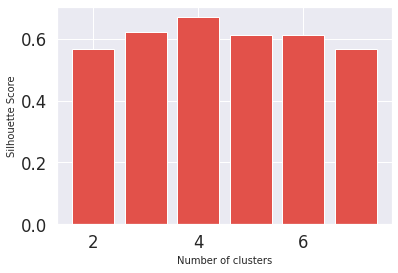

In [99]:
silhouette_scores = [] 

for n_cluster in range(2, 8):
    silhouette_scores.append( 
        silhouette_score(X_std, KMeans(n_clusters = n_cluster).fit_predict(X_std))) 
    
# Plotting a bar graph to compare the results 
k = [2, 3, 4, 5, 6,7] 
plt.bar(k, silhouette_scores) 
plt.xlabel('Number of clusters', fontsize = 10) 
plt.ylabel('Silhouette Score', fontsize = 10) 
plt.show() 

Secara umum, algoritma dari Silhouette analysis yaitu mengukur seberapa dekat (baik) setiap titik pada sebuah cluster dengan titik-titik data lain di clusternya. Semakin tinggi nilai rata-rata dari silhouette, menunjukkan suatu peng-cluster-an yang baik. Dilihat dari grafik di atas, number of clusters = 4 memiliki nilai rata-rata dari silhouette tertinggi, maka number of clusters = 4 menunjukkan suatu peng-cluster-an yang baik.

In [100]:
# Fitting K-Means to the dataset
kmeans = KMeans(init="k-means++",n_clusters = 4, n_init = 10, max_iter=300, random_state = 42)
y_kmeans = kmeans.fit_predict(X_std)

In [101]:
# Visualising the clusters
plt.figure(figsize=(15,7))
sns.scatterplot(X_std[y_kmeans == 0, 0], X_std[y_kmeans == 0, 1], color = 'yellow', label = 'Cluster 1',s=50)
sns.scatterplot(X_std[y_kmeans == 1, 0], X_std[y_kmeans == 1, 1], color = 'blue', label = 'Cluster 2',s=50)
sns.scatterplot(X_std[y_kmeans == 2, 0], X_std[y_kmeans == 2, 1], color = 'green', label = 'Cluster 3',s=50)
sns.scatterplot(X_std[y_kmeans == 3, 0], X_std[y_kmeans == 3, 1], color = 'grey', label = 'Cluster 4',s=50)
sns.scatterplot(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], color = 'red', 
                label = 'Centroids',s=300,marker=',')
plt.grid(False)
plt.title('Cluster Nutrisi')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning